# What drives the price of a car?

![](https://github.com/ygbgames/ml-car-prediction/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

#### Problem Statement

The key problem for the used cars dealerships to determine the price of the used cars. Initial hypothesis is that car prices could be majorly impacted by year, mileage and manufacturer which should be validated.

#### Goals

*   Develop a model to accurately predict the price of a car
*   Identify the key factors influencing the price

We are provided a dataset and we can apply CRISP-DM methodology to systematically solve this poblem.

We will follow below steps.
1.   Analyze the dataset provided
2.   Prepare the data for taining
3.   Develop models
4.   Evaluate model performance
4.   Deliver outcomes


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [24]:
url = 'https://raw.githubusercontent.com/ygbgames/ml-car-prediction/refs/heads/main/data/vehicles.csv'
df = pd.read_csv(url, on_bad_lines='skip')
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [26]:
df.shape

(426880, 18)

### Data Understanding

To understand the data, we will find the distribution of cars across various criterias. Find any outliers and perform data cleanup.

*   Distribution by manufacturer
*   Distribution by condition
*   Distribution by transmission
*   Distribution by cylinders
*   Distribution by years
*   Distribution by price

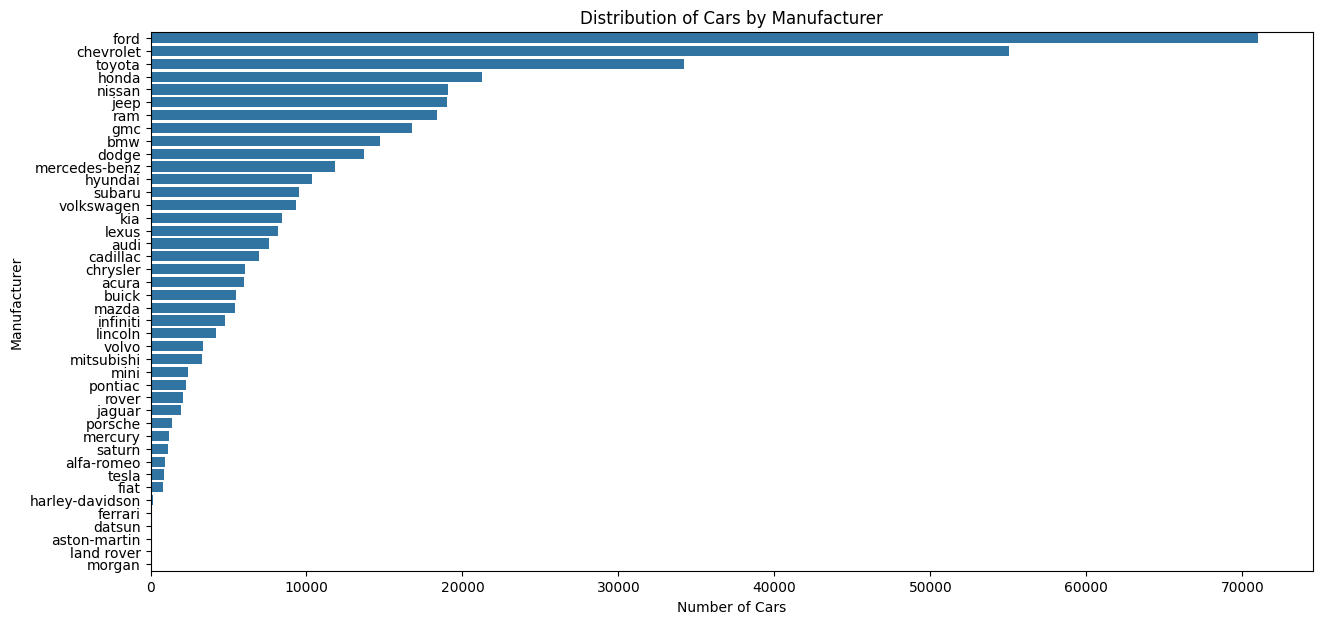

In [27]:
plt.figure(figsize=(15, 7))
sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().index)
plt.title('Distribution of Cars by Manufacturer')
plt.xlabel('Number of Cars')
plt.ylabel('Manufacturer')
plt.show()

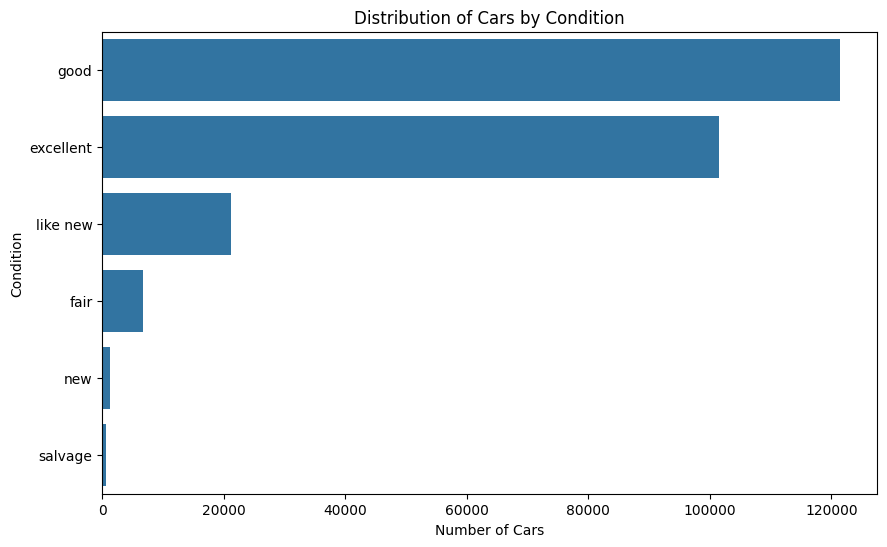

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y='condition', data=df, order=df['condition'].value_counts().index)
plt.title('Distribution of Cars by Condition')
plt.xlabel('Number of Cars')
plt.ylabel('Condition')
plt.show()

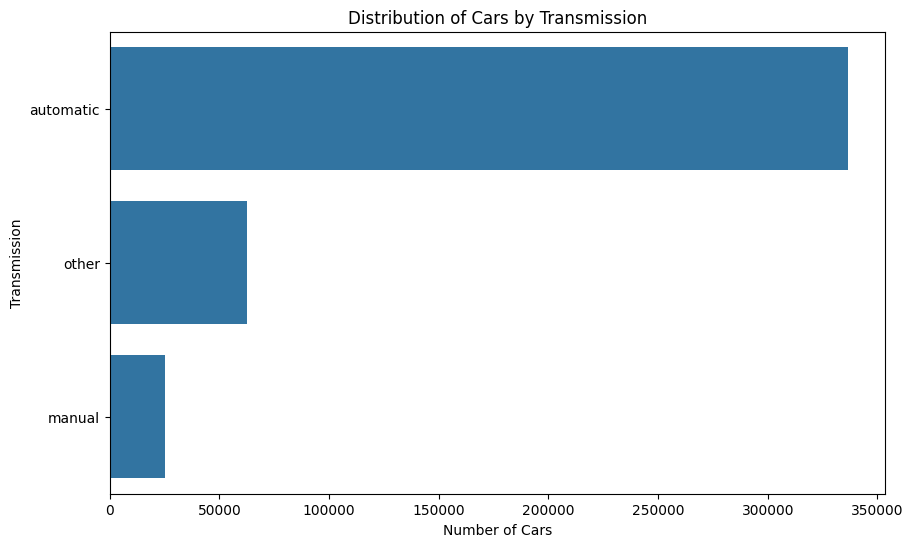

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(y='transmission', data=df, order=df['transmission'].value_counts().index)
plt.title('Distribution of Cars by Transmission')
plt.xlabel('Number of Cars')
plt.ylabel('Transmission')
plt.show()

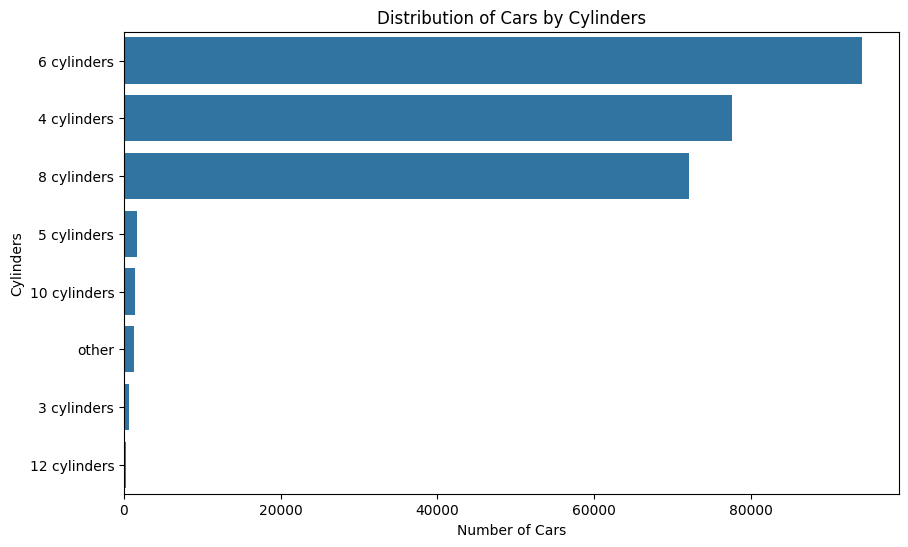

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(y='cylinders', data=df, order=df['cylinders'].value_counts().index)
plt.title('Distribution of Cars by Cylinders')
plt.xlabel('Number of Cars')
plt.ylabel('Cylinders')
plt.show()

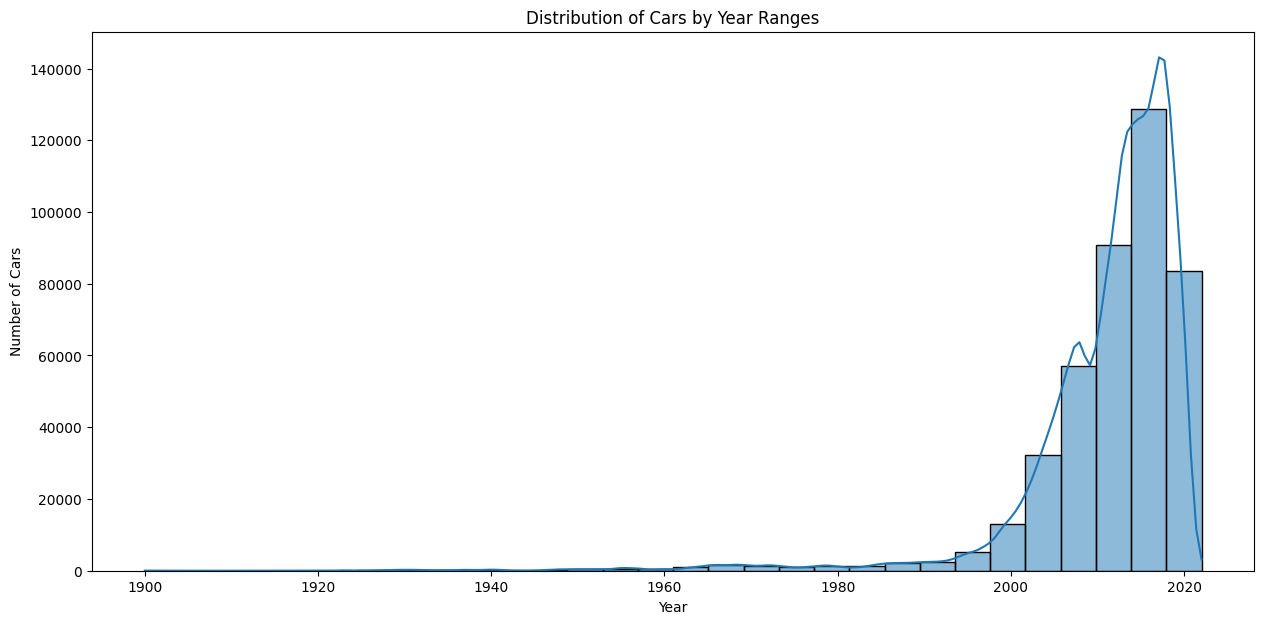

In [31]:
plt.figure(figsize=(15, 7))
sns.histplot(df['year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Cars by Year Ranges')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

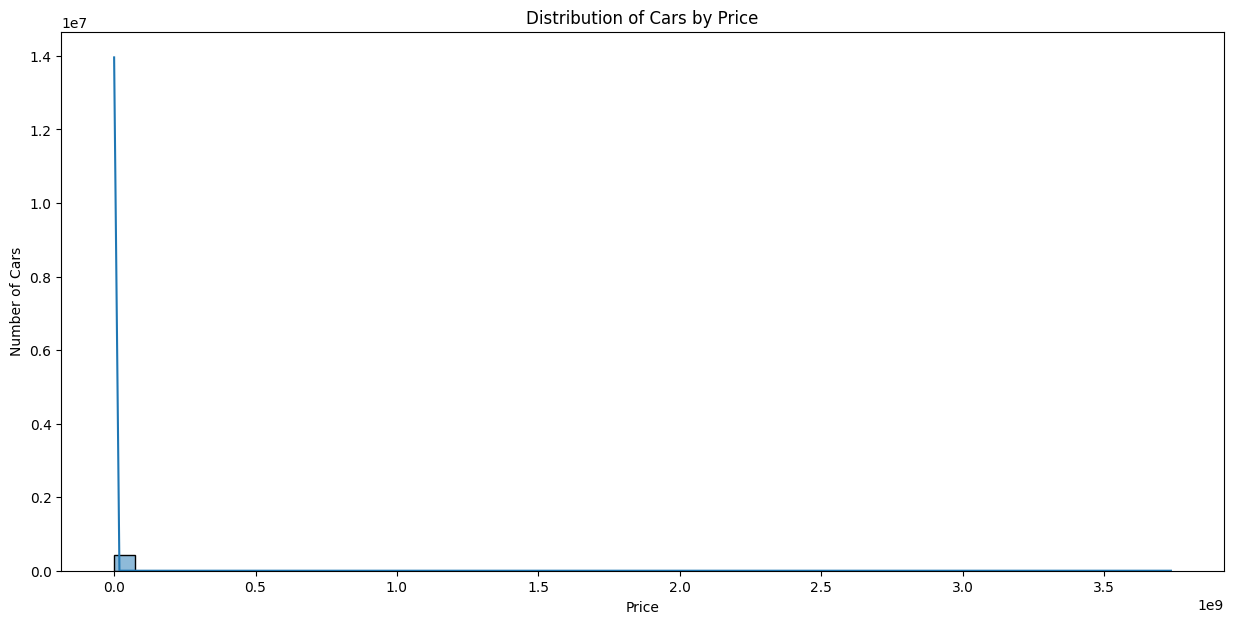

In [32]:
plt.figure(figsize=(15, 7))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Cars by Price')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.show()

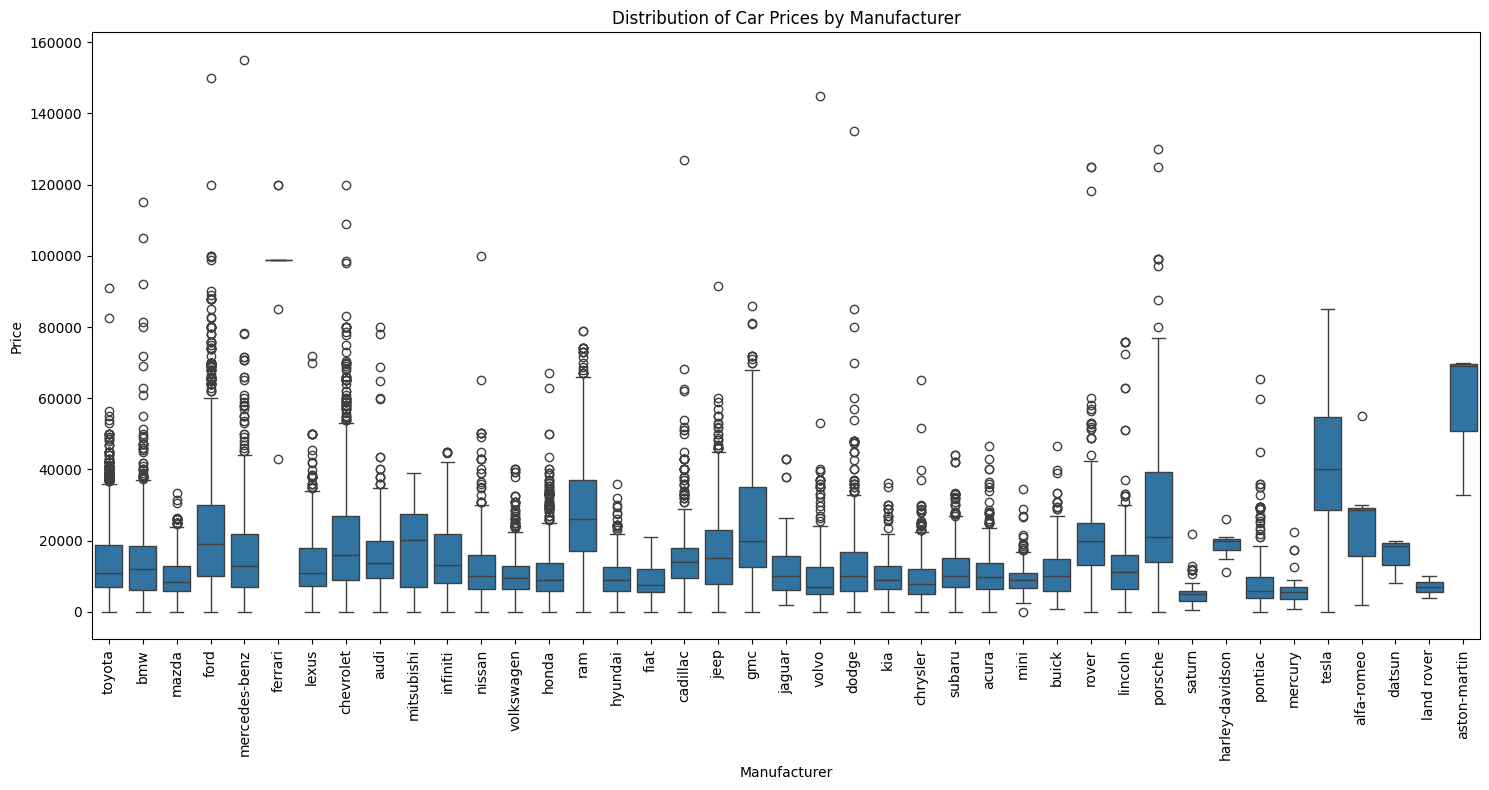

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='manufacturer', y='price', data=df_clean)
plt.xticks(rotation=90)
plt.title('Distribution of Car Prices by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

It is clear based on distribution that few manufacturers are not having lots of data points.

### Data Preparation

Based on few plots and looking at the data it is clear that some cleaning is needed and later fine tuning of the data for modeling.

#### Cleanup

1.   Remove rows with 0 price of cars
2.   Remove rows with NA fields

#### Remove outliers

1.   Remove manufacturers which does not have high data points


In [103]:
df = df[df['price'] != 0]

In [105]:
df_clean = df.dropna().reset_index(drop = True)
## remove duplicates
df_clean = df_clean.drop_duplicates()
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32496 entries, 0 to 32495
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32496 non-null  int64  
 1   region        32496 non-null  object 
 2   price         32496 non-null  int64  
 3   year          32496 non-null  float64
 4   manufacturer  32496 non-null  object 
 5   model         32496 non-null  object 
 6   condition     32496 non-null  object 
 7   cylinders     32496 non-null  object 
 8   fuel          32496 non-null  object 
 9   odometer      32496 non-null  float64
 10  title_status  32496 non-null  object 
 11  transmission  32496 non-null  object 
 12  VIN           32496 non-null  object 
 13  drive         32496 non-null  object 
 14  size          32496 non-null  object 
 15  type          32496 non-null  object 
 16  paint_color   32496 non-null  object 
 17  state         32496 non-null  object 
dtypes: float64(2), int64(2), o

,id,price,year,odometer
count,3.249600e+04,32496.000000,32496.000000,3.249600e+04
mean,7.311551e+09,16993.479013,2010.938269,1.089832e+05
std,4.294195e+06,13219.394890,7.274987,1.022710e+05
min,7.301592e+09,1.000000,1905.000000,0.000000e+00
25%,7.308238e+09,7500.000000,2008.000000,6.744975e+04
50%,7.312411e+09,13125.500000,2012.000000,1.055840e+05
75%,7.315154e+09,23395.000000,2015.000000,1.428455e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


Shape of df_clean after removing specified manufacturers: (32438, 18)


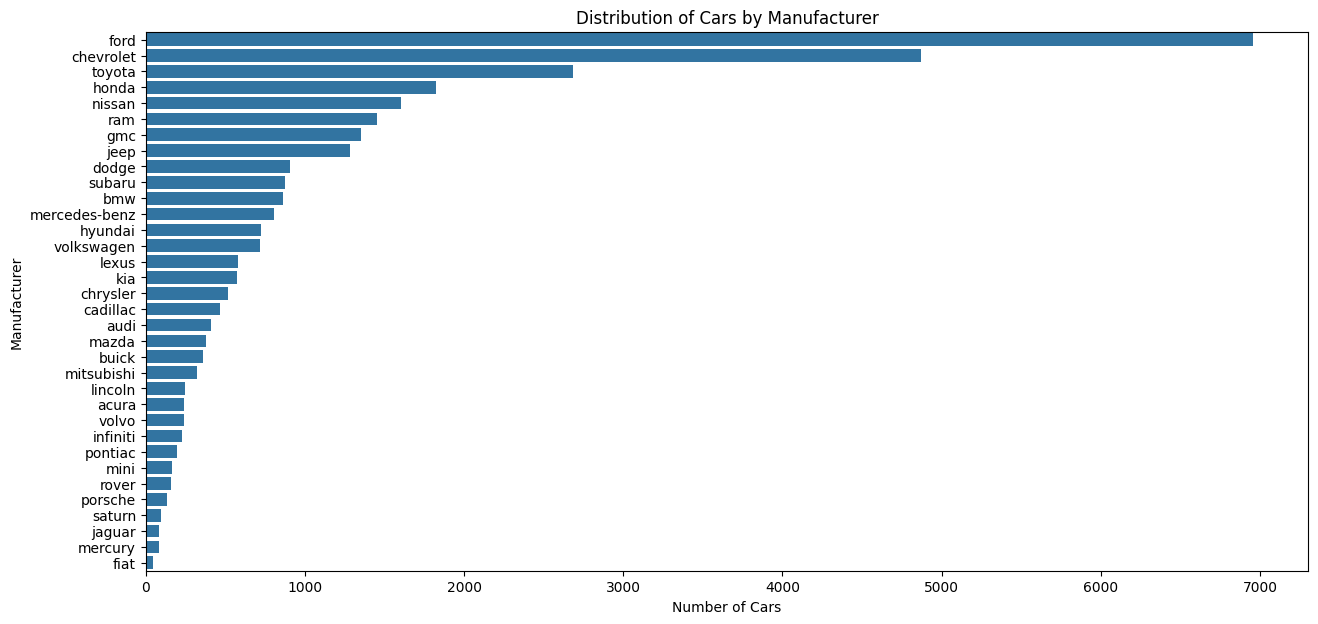

In [106]:
manufacturers_to_remove = ['ferrari', 'aston-martin', 'datsun', 'harley-davidson', 'morgan', 'land rover', 'tesla', 'alfa-romeo']
df_clean = df_clean[~df_clean['manufacturer'].str.lower().isin(manufacturers_to_remove)]
print(f"Shape of df_clean after removing specified manufacturers: {df_clean.shape}")

plt.figure(figsize=(15, 7))
sns.countplot(y='manufacturer', data=df_clean, order=df_clean['manufacturer'].value_counts().index)
plt.title('Distribution of Cars by Manufacturer')
plt.xlabel('Number of Cars')
plt.ylabel('Manufacturer')
plt.show()

In [107]:
columns_to_drop = ['VIN', 'size', 'type', 'state', 'region', 'paint_color', 'drive', 'id', 'model']
df_clean = df_clean.drop(columns=columns_to_drop)
print(f"Shape of df_clean after dropping columns: {df_clean.shape}")
df_clean.head()

Shape of df_clean after dropping columns: (32438, 9)


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission
0,4000,2002.0,toyota,excellent,4 cylinders,gas,155000.0,clean,automatic
1,2500,1995.0,bmw,fair,6 cylinders,gas,110661.0,clean,automatic
2,9000,2008.0,mazda,excellent,4 cylinders,gas,56700.0,clean,automatic
3,8950,2011.0,ford,excellent,6 cylinders,gas,164000.0,clean,automatic
4,4000,1972.0,mercedes-benz,fair,6 cylinders,gas,88100.0,clean,automatic


In [108]:
print("Distinct values for 'cylinders' column:")
print(df_clean['cylinders'].unique())

Distinct values for 'cylinders' column:
['4 cylinders' '6 cylinders' '8 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']


In [109]:
import re

# Function to extract numeric cylinders or return -1
def extract_cylinders(text):
    if pd.isna(text):
        return -1
    match = re.search(r'\d+', str(text))
    if match:
        return int(match.group(0))
    return -1

df_clean['cylinders'] = df_clean['cylinders'].apply(extract_cylinders)

In [110]:
# Identify categorical columns for one-hot encoding (excluding 'model' for now)
categorical_cols = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

/tmp/ipython-input-1525814265.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


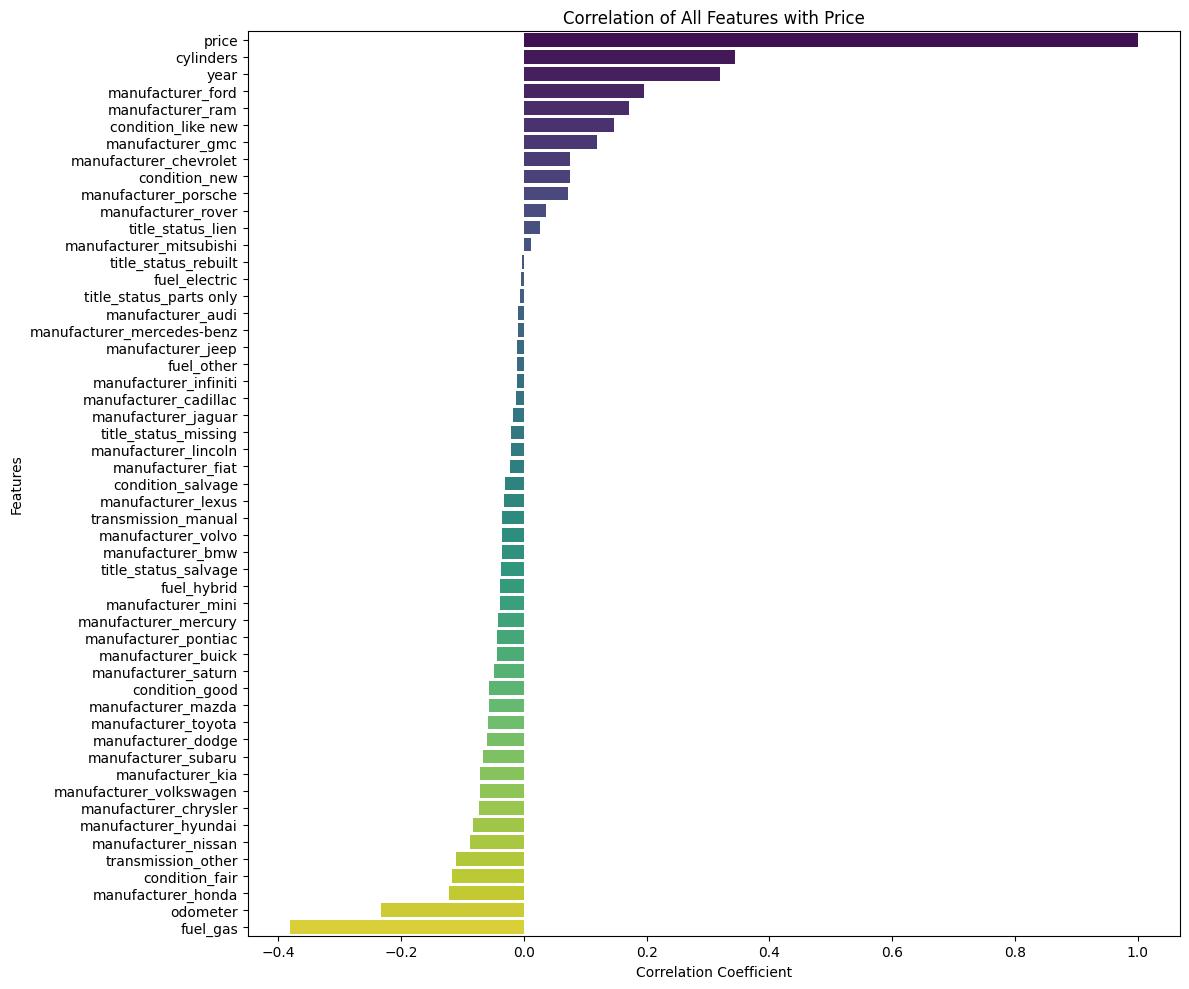

Correlation of All Features with Price:
price                         1.000000
cylinders                     0.344539
year                          0.319561
manufacturer_ford             0.195940
manufacturer_ram              0.171992
condition_like new            0.145979
manufacturer_gmc              0.119337
manufacturer_chevrolet        0.074398
condition_new                 0.074264
manufacturer_porsche          0.072281
manufacturer_rover            0.036151
title_status_lien             0.026469
manufacturer_mitsubishi       0.011334
title_status_rebuilt         -0.002552
fuel_electric                -0.004800
title_status_parts only      -0.006920
manufacturer_audi            -0.010263
manufacturer_mercedes-benz   -0.010310
manufacturer_jeep            -0.011025
fuel_other                   -0.011295
manufacturer_infiniti        -0.012078
manufacturer_cadillac        -0.012996
manufacturer_jaguar          -0.017539
title_status_missing         -0.020412
manufacturer_lincoln    

In [111]:
numeric_df_for_corr = df_encoded.select_dtypes(include=[np.number, bool])
correlations = numeric_df_for_corr.corr()['price'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of All Features with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("Correlation of All Features with Price:")
print(correlations)

In [112]:
df_clean['year'] = df_clean['year'].astype('int64')
df_clean['odometer'] = df_clean['odometer'].astype('int64')
print("Data types after conversion:")
df_clean[['year', 'odometer']].info()

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 32438 entries, 0 to 32495
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      32438 non-null  int64
 1   odometer  32438 non-null  int64
dtypes: int64(2)
memory usage: 760.3 KB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

We are trying 3 different models and compute the RMSE and R2 Score of all 3 models for predicting the prices.
1. Ridge
2. Random Forest
3. Linear Regression

In [113]:
from sklearn.model_selection import train_test_split

# Drop 'model' columns as they are not suitable for direct modeling
df_model = df_encoded.drop(columns=['model'], errors='ignore')

# Define features (X) and target (y)
X = df_model.drop('price', axis=1)
y = df_model['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (25950, 52)
Shape of X_test: (6488, 52)
Shape of y_train: (25950,)
Shape of y_test: (6488,)


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Linear Regression
print("\n--- Linear Regression Model ---")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.2f}")
print(f"Linear Regression - R2 Score: {r2_lr:.2f}")


--- Linear Regression Model ---
Linear Regression - RMSE: 9987.52
Linear Regression - R2 Score: 0.42


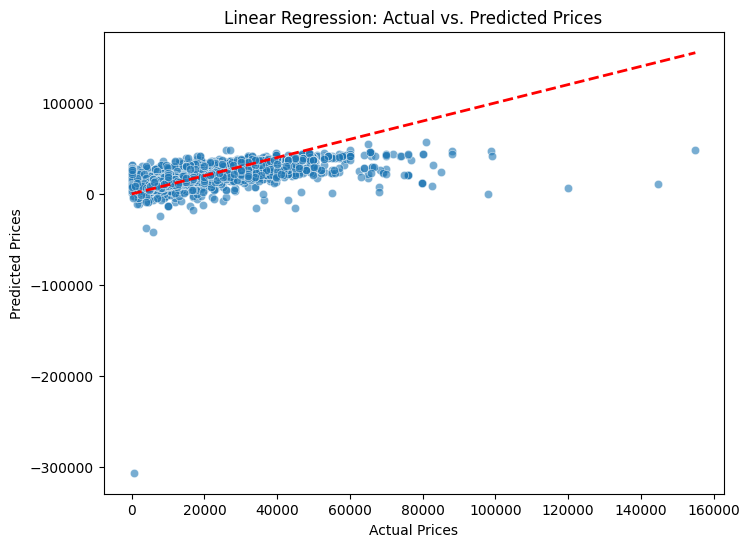

In [115]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [116]:
from sklearn.linear_model import Ridge

# 2. Ridge Regression
print("\n--- Ridge Regression Model ---")
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - RMSE: {rmse_ridge:.2f}")
print(f"Ridge Regression - R2 Score: {r2_ridge:.2f}")


--- Ridge Regression Model ---
Ridge Regression - RMSE: 9987.06
Ridge Regression - R2 Score: 0.42


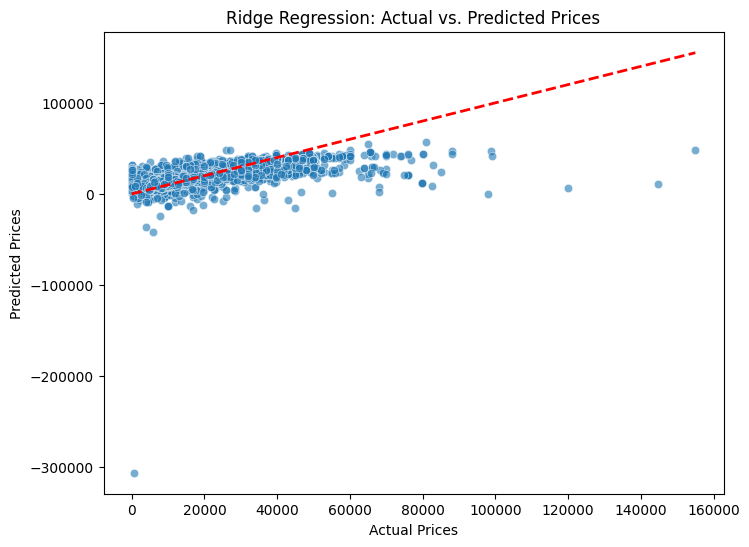

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Ridge Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [118]:
from sklearn.ensemble import RandomForestRegressor

# 3. Random Forest Regressor
print("\n--- Random Forest Regressor Model ---")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - RMSE: {rmse_rf:.2f}")
print(f"Random Forest Regressor - R2 Score: {r2_rf:.2f}")


--- Random Forest Regressor Model ---
Random Forest Regressor - RMSE: 5110.98
Random Forest Regressor - R2 Score: 0.85


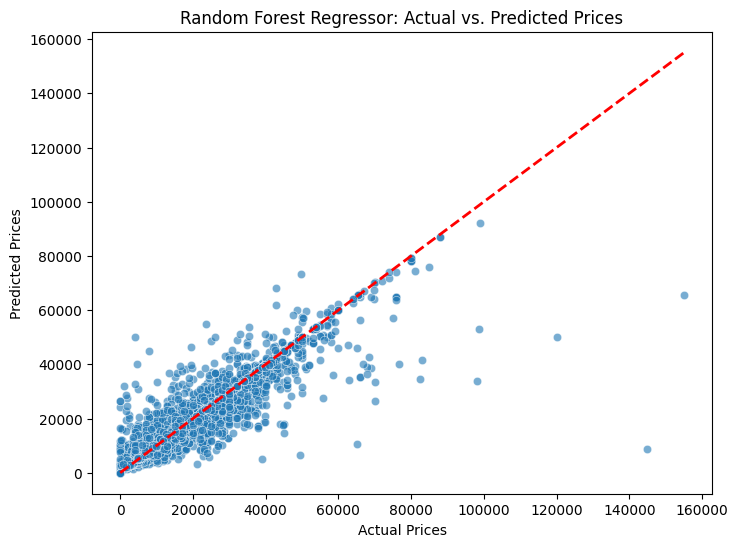

In [119]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest Regressor: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### Evaluation

Finalize which model works best based on the scores achieved in training.

/tmp/ipython-input-995165554.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-995165554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[1], palette='plasma')


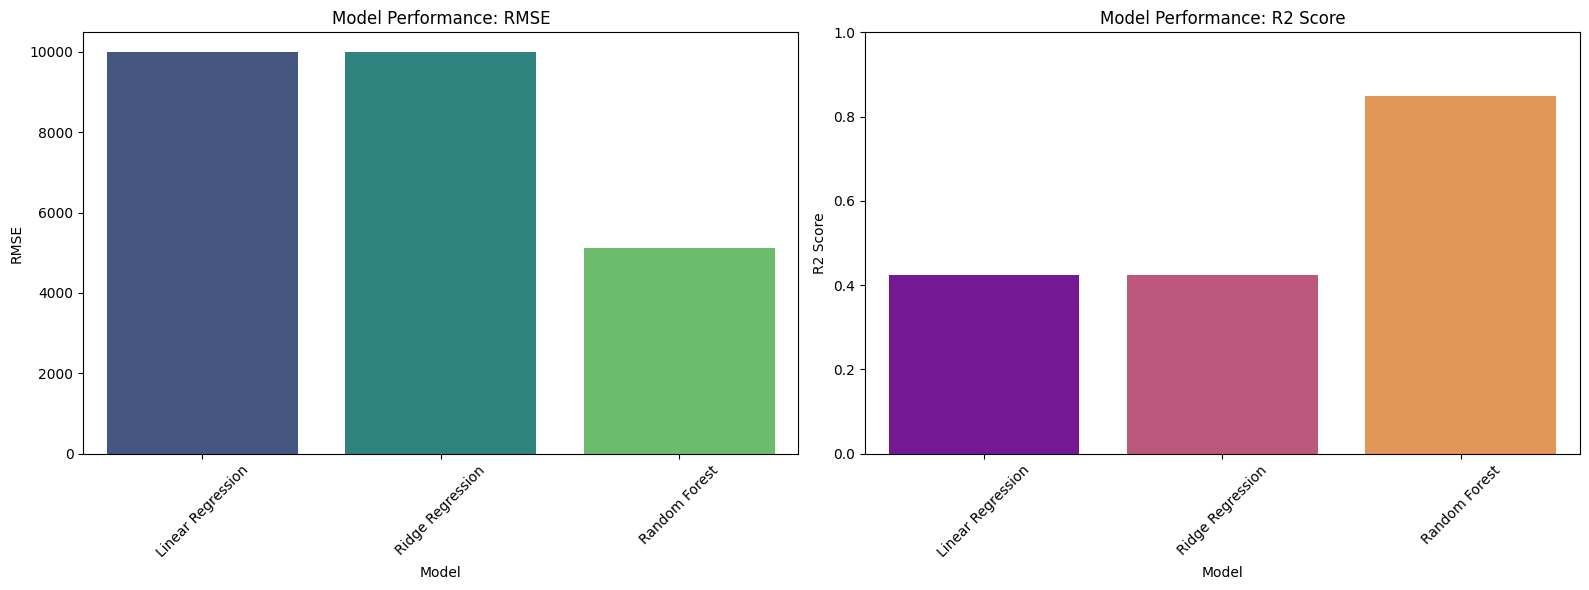

In [120]:
model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest']
rmse_scores = [rmse_lr, rmse_ridge, rmse_rf]
r2_scores = [r2_lr, r2_ridge, r2_rf]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R2 Score': r2_scores
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title('Model Performance: RMSE')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)

# Plot R2 Score
sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[1], palette='plasma')
axes[1].set_title('Model Performance: R2 Score')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 1) # R2 score is between 0 and 1

plt.tight_layout()
plt.show()

/tmp/ipython-input-1156837851.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='viridis')


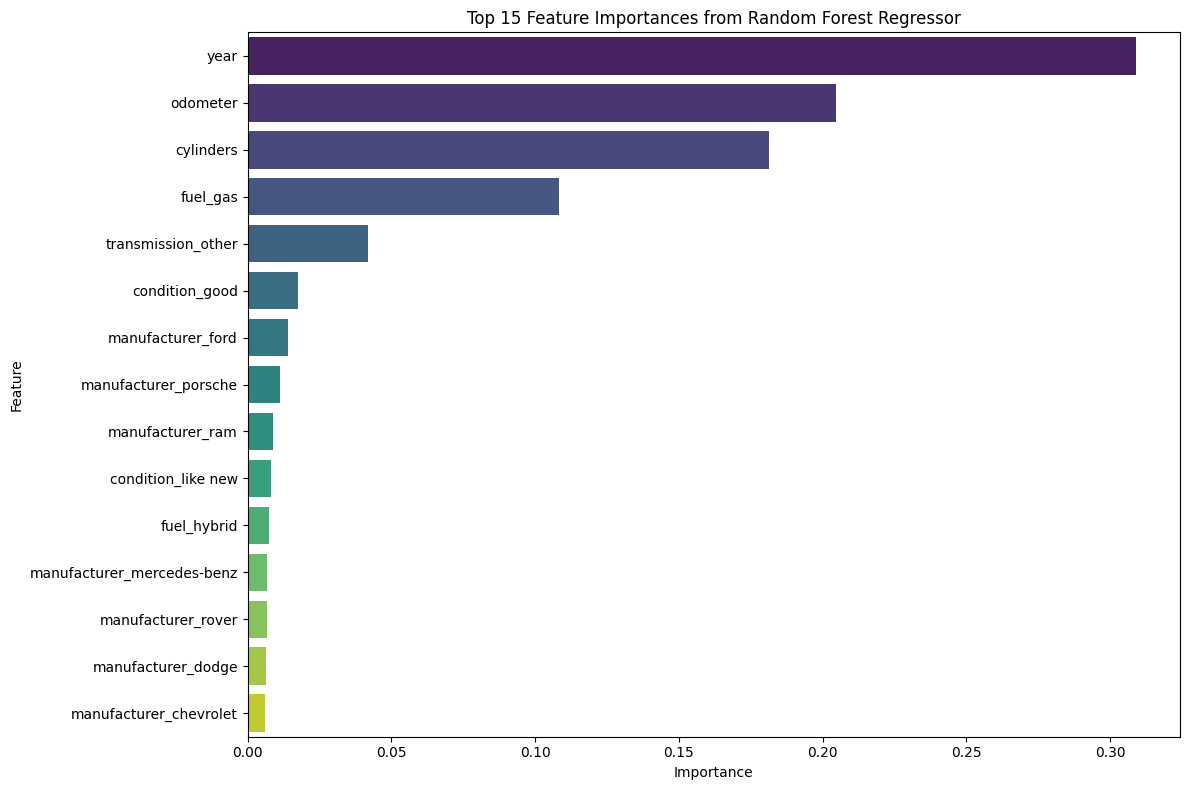

Top 15 Features Contributing to Car Price (Random Forest Model):
                       Feature  Importance
0                         year    0.308850
2                     odometer    0.204595
1                    cylinders    0.181494
42                    fuel_gas    0.108256
51          transmission_other    0.041894
37              condition_good    0.017422
11           manufacturer_ford    0.014200
28        manufacturer_porsche    0.011297
29            manufacturer_ram    0.008741
38          condition_like new    0.007948
43                 fuel_hybrid    0.007313
22  manufacturer_mercedes-benz    0.006902
30          manufacturer_rover    0.006713
9           manufacturer_dodge    0.006537
7       manufacturer_chevrolet    0.006120


In [121]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a Series for feature importances, mapping them to feature names
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the top N features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top 15 Features Contributing to Car Price (Random Forest Model):")
print(features_df.head(15))

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Technical Key Observations
1. Year, odometer and manufacturers are key contributors in price pridiction but also number of cylinders is also very good feature to look for when pricing a car.
2. There are many outliers which were cleaned to prepare the good data for model.
3. Random forest model provides best perfomance and can be used for prediction

Business Values
1. Price is very dependent on features like year, mileage, manufacturers and number of cylinders. Thus dealership should always consider them when looking at the price of the car.
2. Newer cars gets higher value
3. Good condition of car is very important as its directly impact the price
4.
